In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# load data from csv into dataframe

df = pd.read_csv('Data/kc_house_data.csv')

In [3]:
# inspect first five rows

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


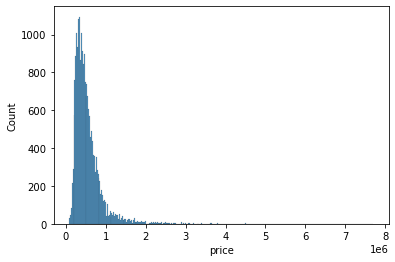

In [4]:
# view distribution of price

sns.histplot(df['price']);

In [5]:
# remove outliers prior to linear regression

df = df.loc[ df['price'] < 1000000, :].copy()

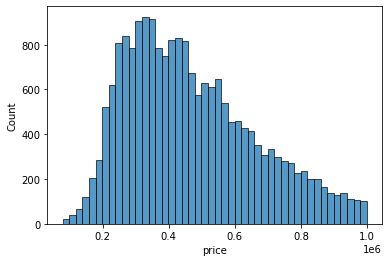

In [6]:
# view distribution of price with outliers removed

sns.histplot(df['price']);

In [7]:
# inspect first five rows

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
# are there any null values in predictor?

df['sqft_living'].isna().sum()

0

In [9]:
# check that predictor is float

df['sqft_living'].describe()

count    20107.00000
mean      1954.36082
std        754.83748
min        370.00000
25%       1390.00000
50%       1840.00000
75%       2410.00000
max       7480.00000
Name: sqft_living, dtype: float64

In [10]:
# are there null values for price?

df['price'].isna().sum()

0

## Split Data into Training and Test Sets

In [11]:
# import library for train test split

from sklearn.model_selection import train_test_split

# 70% / 30% train test split

X_train, X_test, y_train, y_test = train_test_split(
    df[['sqft_living']], df[['price']], test_size=0.3, random_state=421)

# inspect X_train first five rows

X_train.head()

,sqft_living
6163,1510
10590,2010
411,833
14502,1710
11376,2320


In [14]:
# concatenate X_train & y_train for statsmodels linear regression

all_train = pd.concat([X_train, y_train], axis=1)

## Statsmodels

In [15]:
formula = 'price ~ sqft_living'

model = ols(formula=formula, data=all_train).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     7910.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:49:28   Log-Likelihood:            -1.8826e+05
No. Observations:               14074   AIC:                         3.765e+05
Df Residuals:                   14072   BIC:                         3.765e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.628e+05   3656.752     44.525      0.000    1.56e+05     1.7e+05
sqft_living   155.1479      1.744     88.937      0.000     151.728     158.567
==============================================================================
Omnibus:                      479.899   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.638
Skew:                           0.474   Prob(JB):                    9.78e-116
Kurtosis:                       2.932   Cond. No.                     5.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


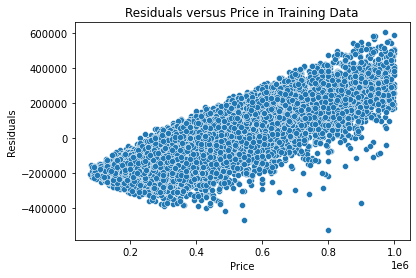

In [17]:
# plot residuals versus price for training data

fig, ax = plt.subplots()

ax.set(title='Residuals versus Price in Training Data', ylabel='Residuals', xlabel='Price')

sns.scatterplot(y_train['price'], (y_train['price'] - model.predict(X_train)).values);

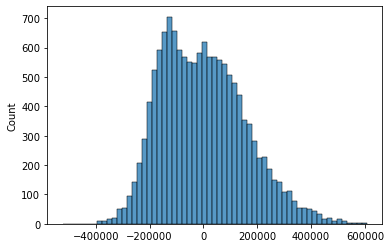

In [18]:
# check distribution of residuals visually

sns.histplot((y_train['price'] - model.predict(X_train)).values);

In [19]:
residuals = (y_train['price'] - model.predict(X_train)).values

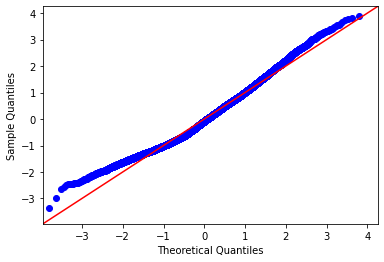

In [21]:
# check qq plot for normality of residuals

sm.qqplot(residuals, fit=True, line='45');

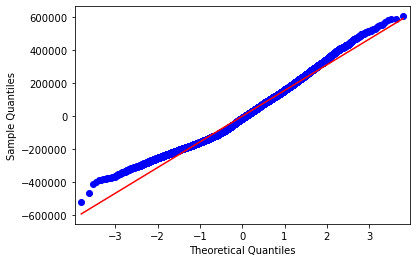

In [22]:
sm.qqplot(residuals, line='s');

## Sci Kit Learn

In [26]:
# import Linear Regression function from scikit learn linear model module

from sklearn.linear_model import LinearRegression

In [27]:
# instantiate the model

lr = LinearRegression()

In [28]:
# import cross validation function from sci kit learn module model selection

from sklearn.model_selection import cross_validate

In [29]:
# check cross validation scores for baseline model

cross_validate(lr, X_train, y_train)['test_score']

array([0.35474716, 0.35389142, 0.36682699, 0.35017069, 0.37127386])

The baseline model describes about 35% of the variance in price.

In [30]:
# now fit linear regression model to training data, to compute residuals

lr.fit(X_train, y_train)

LinearRegression()

In [31]:
# check coefficients

print(f'Slope: {lr.coef_[0][0]}')

print(f'y-intercept: {lr.intercept_[0]}')

Slope: 155.14785228755943
y-intercept: 162818.12906414107


In [32]:
# compute residuals for training data

prediction = lr.predict(X_train)

residuals = (y_train - prediction)

In [33]:
residuals.shape

(14074, 1)

In [34]:
residuals

,price
6163,177908.613982
10590,-2448.312162
411,225477.709980
14502,-198120.956476
11376,127238.853629
...,...
20832,-106460.822638
3311,-131047.569888
531,-173819.208175
19745,227739.393184


/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


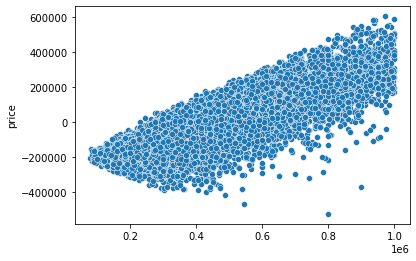

In [35]:
# plot residuals versus price (for training data)

sns.scatterplot(y_train['price'].values, residuals['price']);

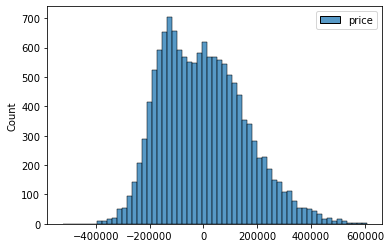

In [36]:
# check distribution of residuals visually

sns.histplot(residuals);

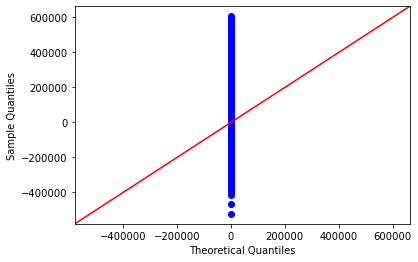

In [37]:
# inspect residuals vs. normal qqplot

sm.qqplot(residuals, line='45');

In [38]:
# do I need to scale residuals? It looks like the theoretical quantiles are clustered around 0, as if for a N(0, 1)

# print mean residual

np.mean(residuals)

price    3.176317e-12
dtype: float64

In [39]:
# print standard deviation of residuals

np.std(residuals)

price    155971.663406
dtype: float64

In [40]:
# try scaling residuals

scaled_residuals = (residuals - np.mean(residuals))/np.std(residuals)

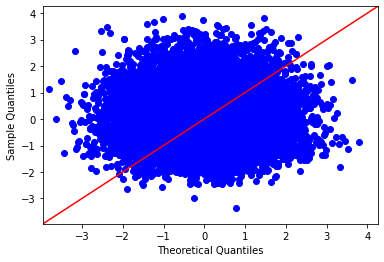

In [41]:
# reprint qq plot

sm.qqplot(scaled_residuals, line='45');

The scaled residuals don't appear to be normal either. I'm not sure how to interpret a qq plot of this shape or with the residuals scaled.

In [42]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==1.1.3
numpy==1.18.5
seaborn==0.11.0
sklearn==0.23.2
statsmodels.api==0.12.0


In [43]:
print(sk.__version__)

0.23.2
